# F1 Winners Data Analysis

This project involves analyzing historical Formula 1  race data to uncover trends and patterns in championship victories. Ket aspects evaluating winning drivers, teams, and countries, with visualization to illustrate perfromance insights across different seasons.

### Importing required Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [6]:
results = pd.read_csv("winners.csv")

### Checking Dataset

In [7]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN


In [5]:
results.tail()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
1105,Saudi Arabia,2024-03-09,Max Verstappen,Red Bull Racing Honda RBPT,50.0,1:20:43.273,VER
1106,Australia,2024-03-24,Carlos Sainz,Ferrari,58.0,1:20:26.843,SAI
1107,Japan,2024-04-07,Max Verstappen,Red Bull Racing Honda RBPT,53.0,1:54:23.566,VER
1108,China,2024-04-21,Max Verstappen,Red Bull Racing Honda RBPT,56.0,1:40:52.554,VER
1109,Miami,2024-05-05,Lando Norris,McLaren Mercedes,57.0,1:30:49.876,NOR


In [8]:
results.shape

(1110, 7)

In [9]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  1110 non-null   object 
 1   Date        1110 non-null   object 
 2   Winner      1110 non-null   object 
 3   Car         1110 non-null   object 
 4   Laps        1107 non-null   float64
 5   Time        1107 non-null   object 
 6   Name Code   1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [10]:
results.isna().sum()

Grand Prix    0
Date          0
Winner        0
Car           0
Laps          3
Time          3
Name Code     0
dtype: int64

### Observations

1. There are 1110 rows in the dataset which means there are winners of 1110 F1 races in this dataset.
2. There are 7 columns in this dataset:
    - Grand Prix: Name of Grand Prix/ Race
    - Data: The data on which that race was organized
    - Winner: The name of races who won that race
    - Car: The name of the car(company) which won the race
    - Laps: Number of laps completed by the winner
    - Time: Time taken by winner to complete the race
    - Name Code: The three letter unique code of the name of winning racer
 3. The time column needs to be converted into int\float
 4. The data column need to be converted into datetime.
 5. Only laps and time columns have null values(3) in them.

### Preprocessing

In [12]:
results['Date'] = pd.to_datetime(results['Date'])
results['Year'] = results['Date'].dt.year
results['Month'] = results['Date'].dt.month

In [13]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,5
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,5
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,5
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,6
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,6


In [14]:
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
results['Month'] = results['Month'].map(month_dict)

In [15]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,May
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,May
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,May
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,Jun
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,Jun


In [16]:
hr = []
min = []
sec = []

for i in results['Time']:
    if i is not np.nan:
        if len(i.split(':')) != 3:
            hr.append(0)
            min.append(int(i.split(':')[0]))
            sec.append(float(i.split(':')[1]))
        else:
            hr.append(int(i.split(':')[0]))
            min.append(int(i.split(':')[1]))
            sec.append(float(i.split(':')[2]))
    else:
        hr.append(np.nan)
        min.append(np.nan)
        sec.append(np.nan)


In [17]:
results['Hours'] = hr
results['Minutes'] = min 
results['Seconds'] = sec 

In [18]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,May,2.0,13.0,23.60
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,May,3.0,13.0,18.70
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,May,2.0,46.0,55.97
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,Jun,2.0,2.0,53.70
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,Jun,2.0,47.0,26.00


In [19]:
results['Total Time in Seconds'] = results['Hours'] * 3600 + results['Minutes'] * 60 + results['Seconds']

In [20]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds,Total Time in Seconds
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,May,2.0,13.0,23.60,8003.60
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,May,3.0,13.0,18.70,11598.70
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,May,2.0,46.0,55.97,10015.97
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,Jun,2.0,2.0,53.70,7373.70
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,Jun,2.0,47.0,26.00,10046.00


In [21]:
results['Average Time per lap'] = results['Total Time in Seconds']/results['Laps']

In [22]:
results.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds,Total Time in Seconds,Average Time per lap
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,May,2.0,13.0,23.60,8003.60,114.337143
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,May,3.0,13.0,18.70,11598.70,115.987000
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,May,2.0,46.0,55.97,10015.97,72.579493
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,Jun,2.0,2.0,53.70,7373.70,175.564286
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,Jun,2.0,47.0,26.00,10046.00,287.028571


### Observations:

- Data columns has been converted into datetime.
- New columns for month and year of the race has been created.
- The data in month column is converted from month number to month name so that it is easier to understand.
- New columns for hours, minutes and seconds taken to finish the race has been created by extracting data from time column.
- A new column for total time taken in seconds has been created.
- A new column for total average time per lap has been created.

### Visualizing the data

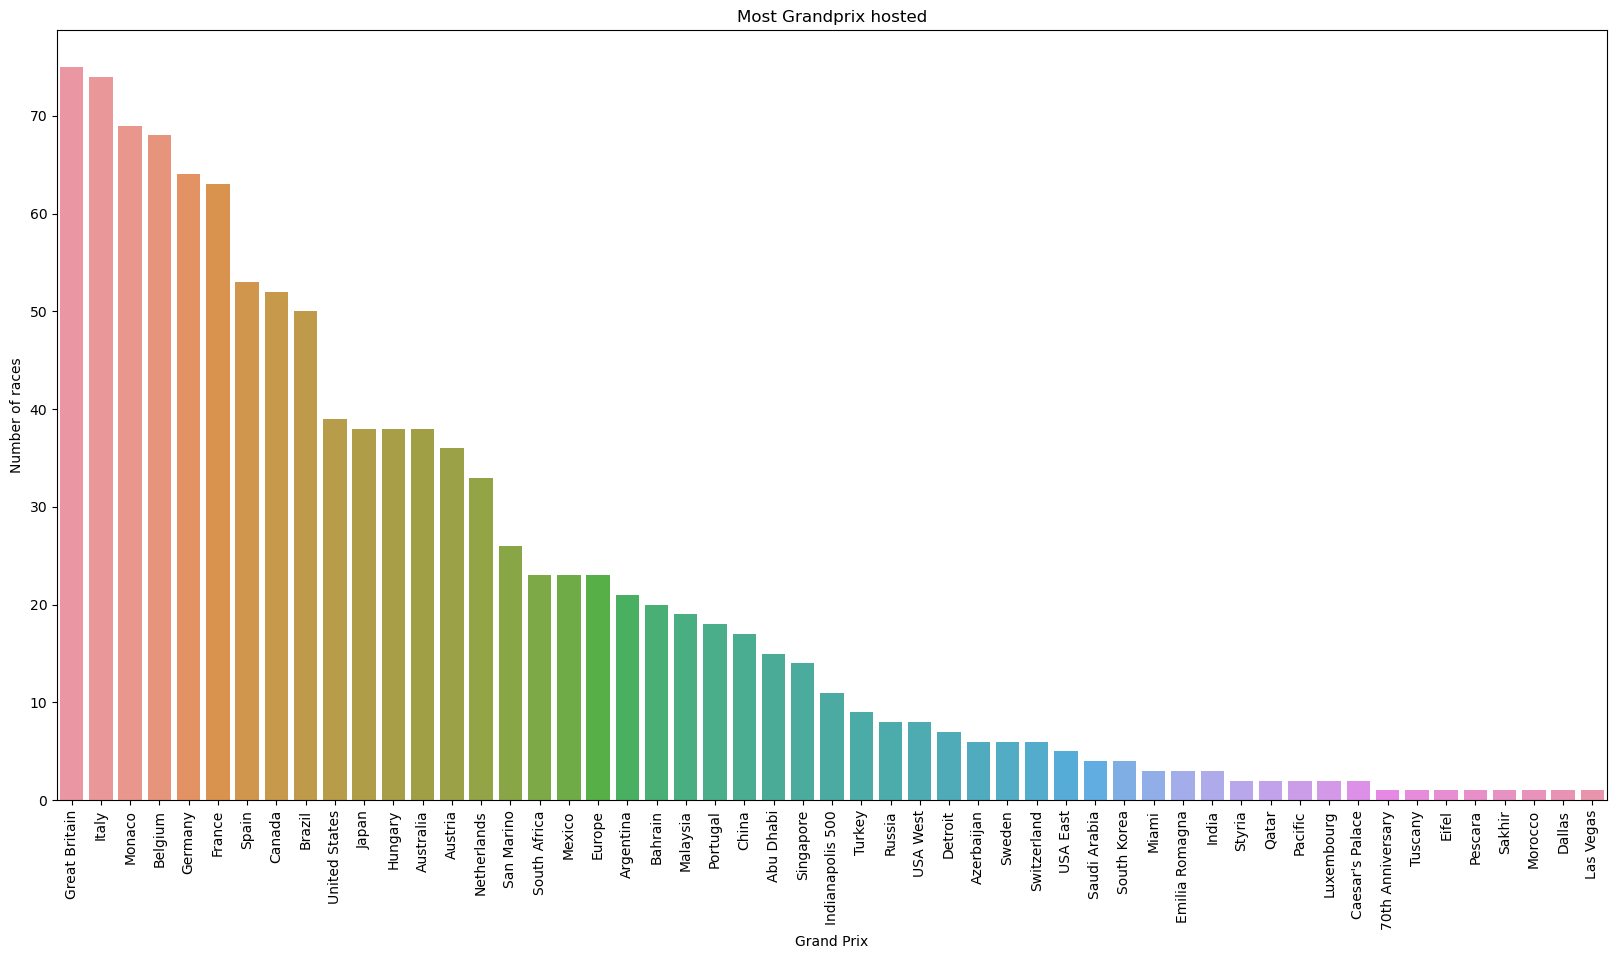

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data = results, x = 'Grand Prix', order=results['Grand Prix'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Most Grandprix hosted')
plt.ylabel('Number of races')
plt.xlabel('Grand Prix')
plt.show()

In [24]:
results['Grand Prix'].value_counts()[:15]

Grand Prix
Great Britain    75
Italy            74
Monaco           69
Belgium          68
Germany          64
France           63
Spain            53
Canada           52
Brazil           50
United States    39
Japan            38
Hungary          38
Australia        38
Austria          36
Netherlands      33
Name: count, dtype: int64

### Observations

- Great Britian Grand Prix was organised the most F1 Races(75) followed by Italy(74),Monaco(69),Belgiu,(68)and Gremany(64)

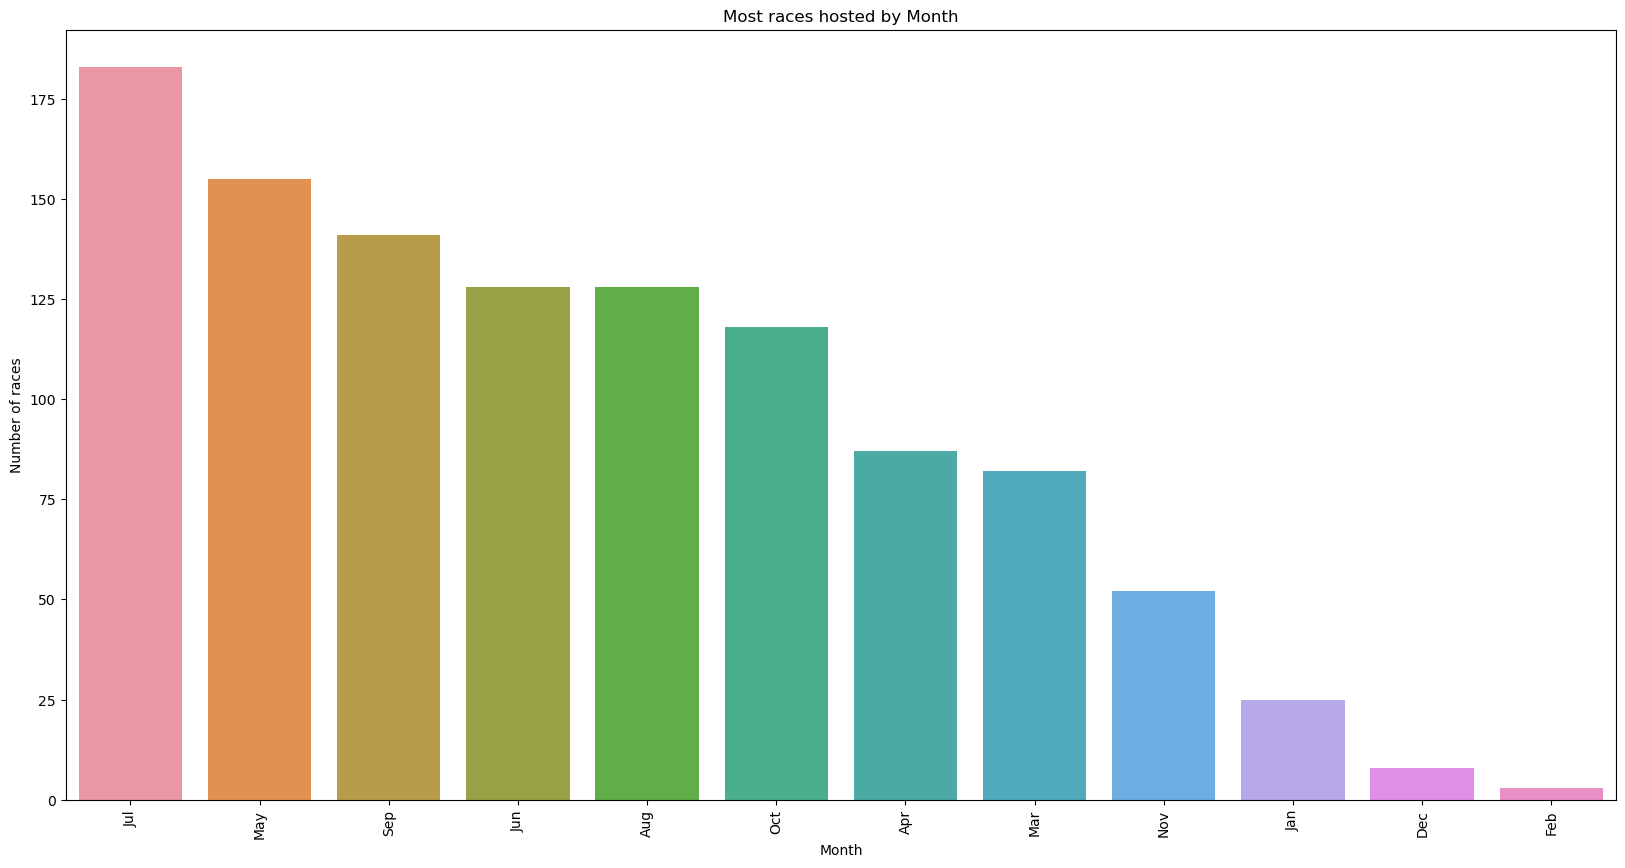

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=results, x ='Month',order = results['Month'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Most races hosted by Month')
plt.ylabel('Number of races')
plt.xlabel('Month')
plt.show()

In [27]:
results['Month'].value_counts()

Month
Jul    183
May    155
Sep    141
Jun    128
Aug    128
Oct    118
Apr     87
Mar     82
Nov     52
Jan     25
Dec      8
Feb      3
Name: count, dtype: int64

### Observations

- Most races took place in the month of July(183) followed by May(155),September(141), June(128) and August(128).
- Months from May to October are most active for races

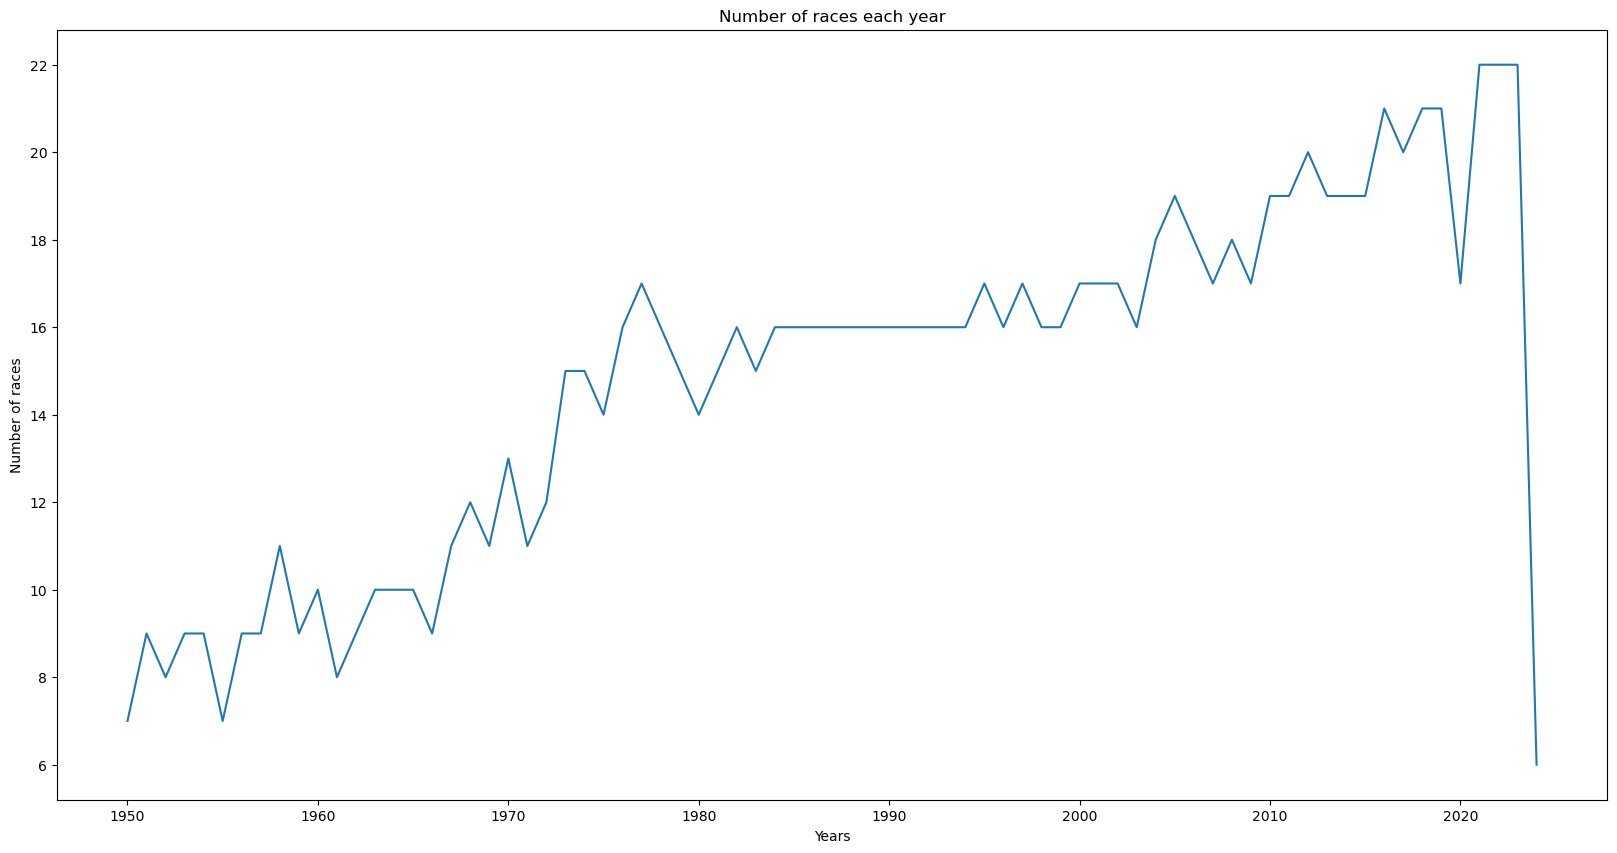

In [30]:
years = results['Year'].value_counts()
plt.figure(figsize=(20,10))
sns.lineplot(years)
plt.title('Number of races each year')
plt.xlabel('Years')
plt.ylabel('Number of races')
plt.show()

### Observations:

- The number of races per year shows an uptrend which means that more races are being organized every year indicating the increasing popularity of F1 races 


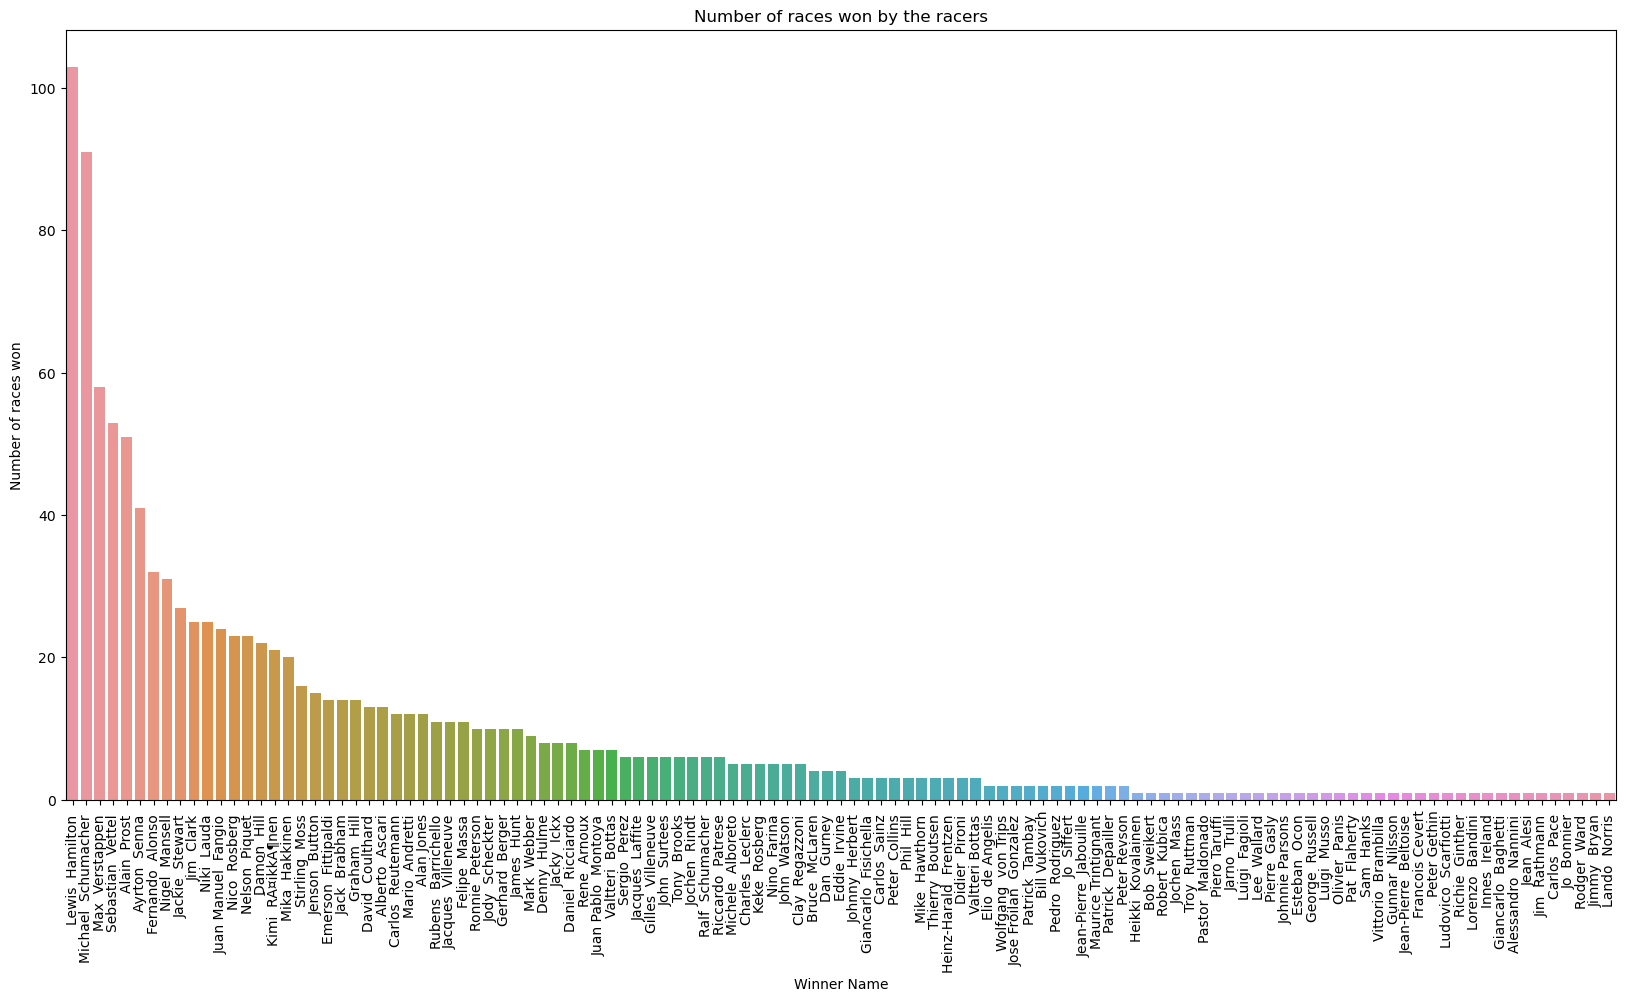

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data=results, x='Winner',order=results['Winner'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number of races won by the racers')
plt.ylabel('Number of races won')
plt.xlabel('Winner Name')
plt.show()

In [32]:
results['Winner'].value_counts()[:15]

Winner
Lewis  Hamilton         103
Michael  Schumacher      91
Max  Verstappen          58
Sebastian  Vettel        53
Alain  Prost             51
Ayrton  Senna            41
Fernando  Alonso         32
Nigel  Mansell           31
Jackie  Stewart          27
Jim  Clark               25
Niki  Lauda              25
Juan Manuel  Fangio      24
Nico  Rosberg            23
Nelson  Piquet           23
Damon  Hill              22
Name: count, dtype: int64

### Observations:

- Lewis Hamilton has won most number of races(103) followed by Michael Schumacher(91), Max Verstappen(58), Sebastian Vettel(53) and Alian Prost(51)

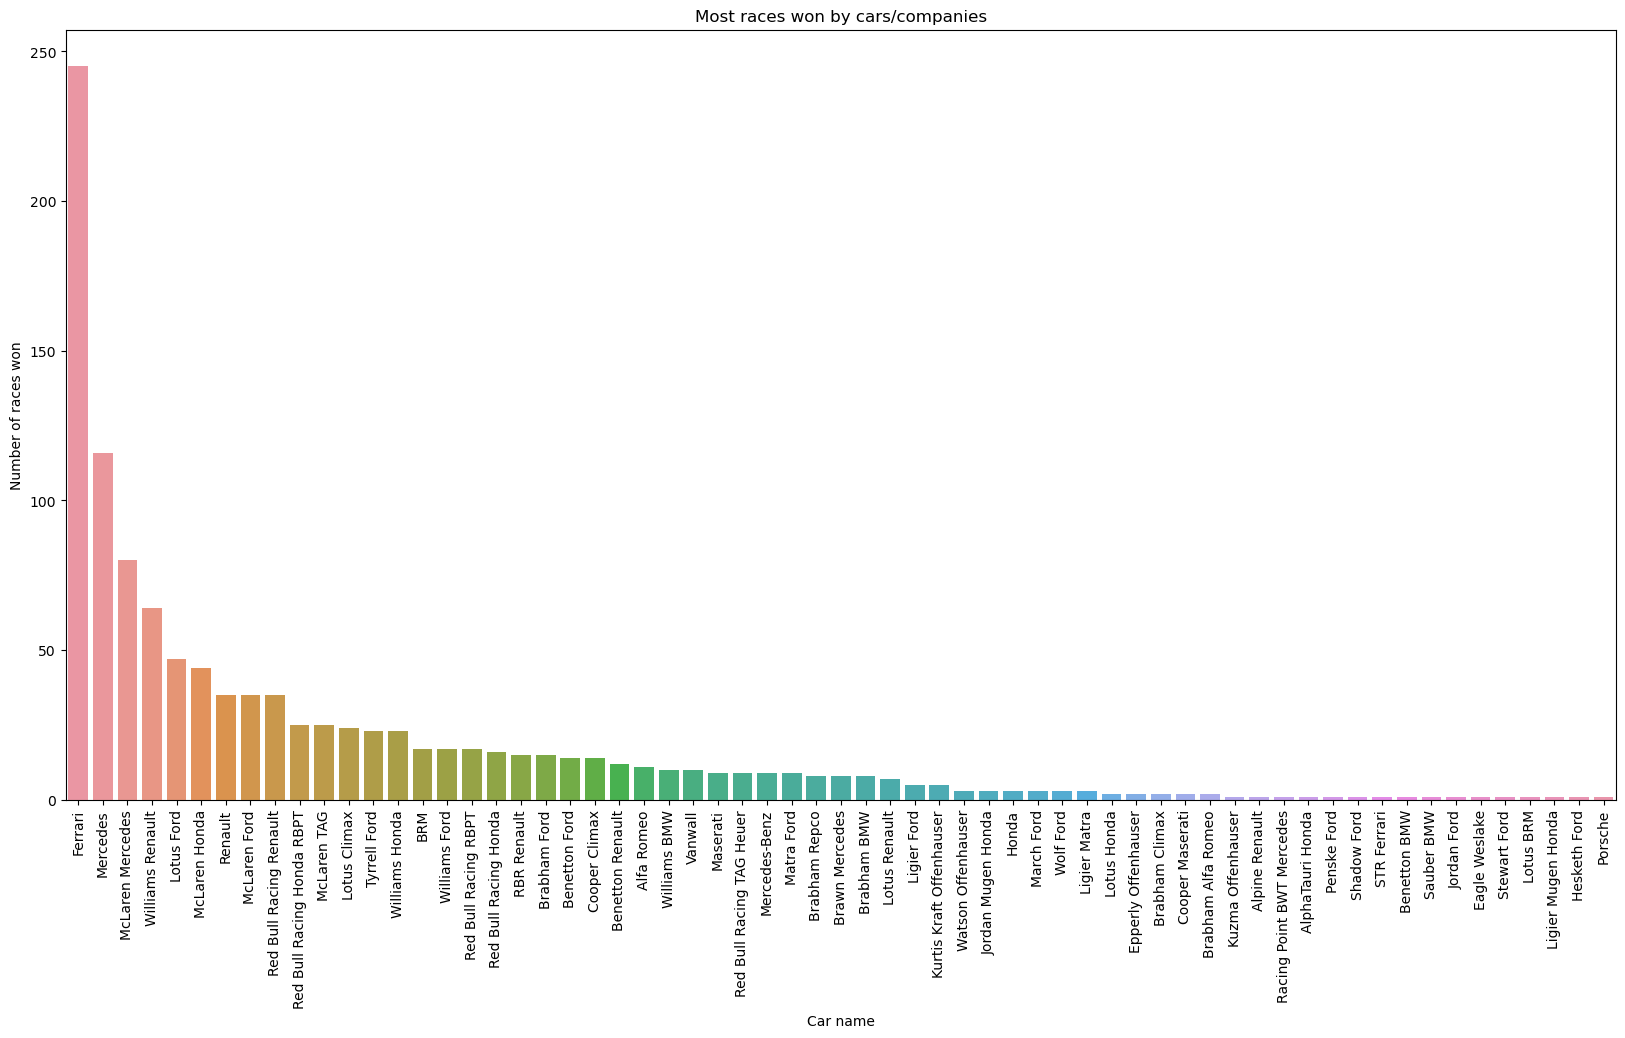

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(data=results, x='Car',order=results['Car'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Most races won by cars/companies')
plt.ylabel('Number of races won')
plt.xlabel('Car name')
plt.show()

In [36]:
results['Car'].value_counts()[:15]

Car
Ferrari                       245
Mercedes                      116
McLaren Mercedes               80
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
Renault                        35
McLaren Ford                   35
Red Bull Racing Renault        35
Red Bull Racing Honda RBPT     25
McLaren TAG                    25
Lotus Climax                   24
Tyrrell Ford                   23
Williams Honda                 23
BRM                            17
Name: count, dtype: int64

### Observations:

- Ferrari has completely dominated in terms of winning F1
- Ferrari has won most races(245) followed by Mercedes(116), Mclaren Mercedes(80) and Williams Renault(64)

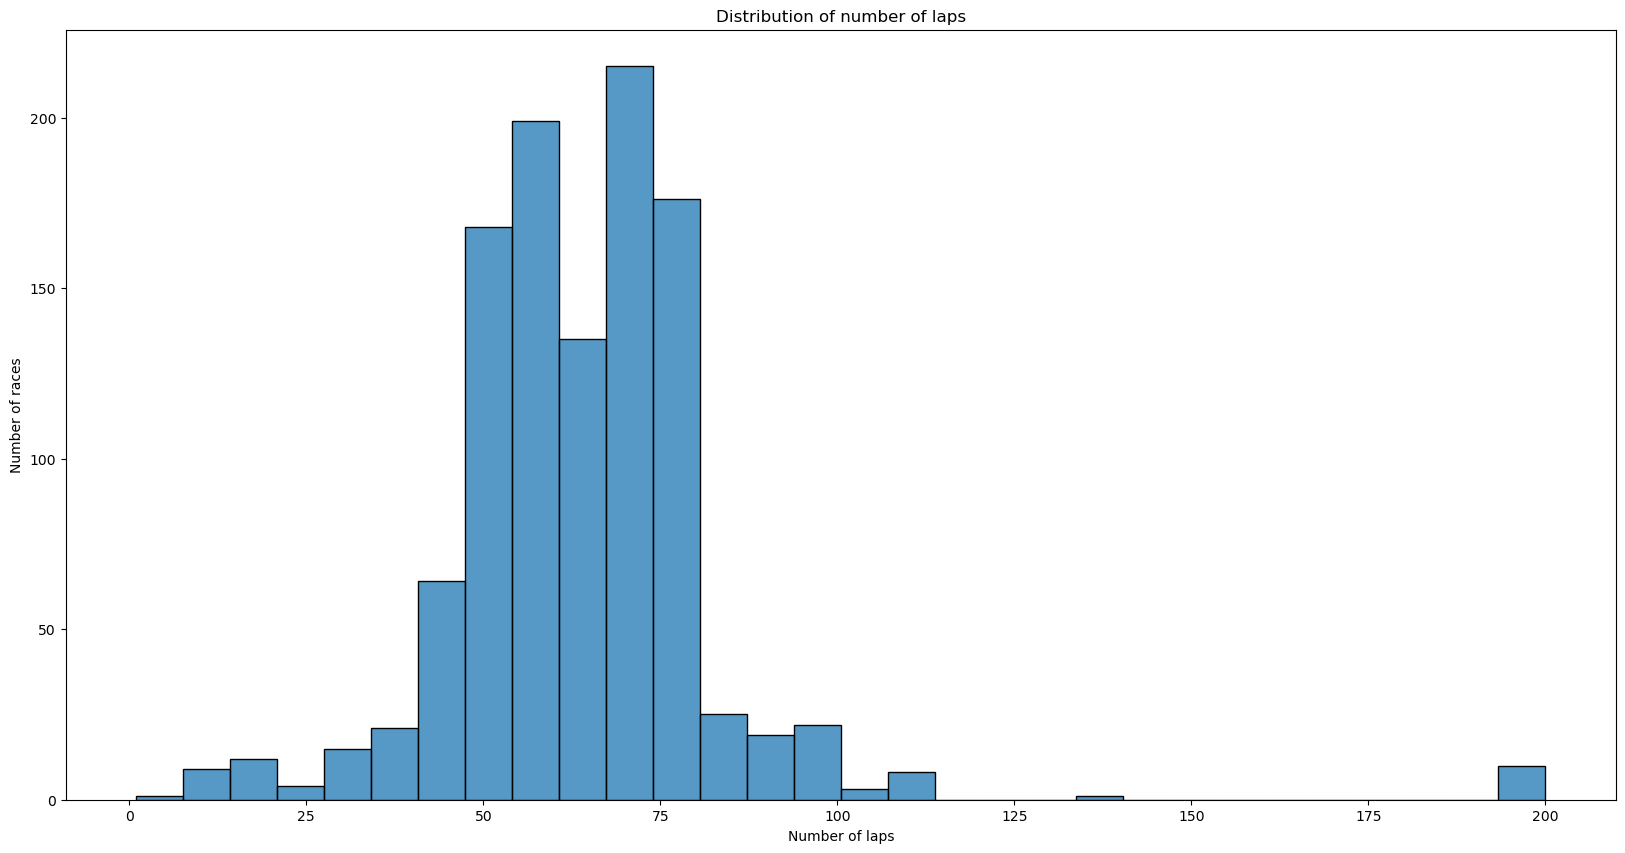

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(data = results, x='Laps',bins = 30)
plt.title('Distribution of number of laps')
plt.ylabel('Number of races')
plt.xlabel('Number of laps')
plt.show()

In [40]:
results['Laps'].mean(), results['Laps'].median()

(64.65401987353206, 65.0)

### Observations:

- Most races have laps between 40 to 80
- The average and median values of laps per race is 65

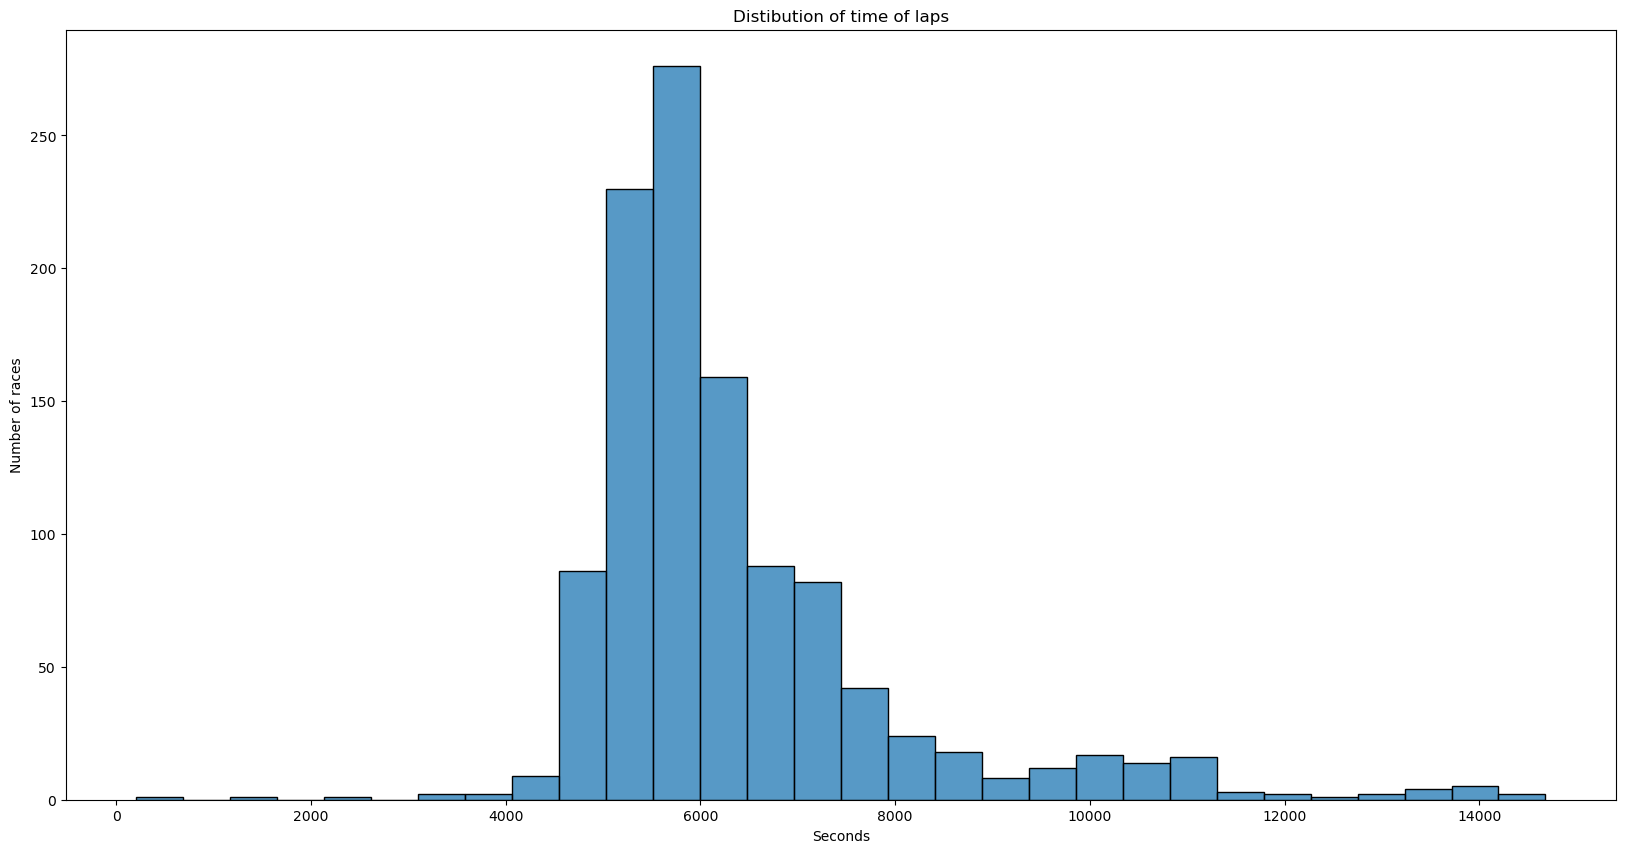

In [41]:
plt.figure(figsize=(20,10))
sns.histplot(data = results, x='Total Time in Seconds',bins=30)
plt.title('Distibution of time of laps')
plt.ylabel('Number of races')
plt.xlabel('Seconds')
plt.show()

In [42]:
results[results['Total Time in Seconds']== results['Total Time in Seconds'].max()]

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds,Total Time in Seconds,Average Time per lap
848,Canada,2011-06-12,Jenson Button,McLaren Mercedes,70.0,4:04:39.537,BUT,2011,Jun,4.0,4.0,39.537,14679.537,209.707671


In [43]:
results[results['Total Time in Seconds']== results['Total Time in Seconds'].min()]

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds,Total Time in Seconds,Average Time per lap
1049,Belgium,2021-08-29,Max Verstappen,Red Bull Racing Honda,1.0,0:03:27.071,VER,2021,Aug,0.0,3.0,27.071,207.071,207.071


In [46]:
results['Total Time in Seconds'].mean(), results['Total Time in Seconds'].median()

(6370.192981933153, 5893.83)

### Observations:

- Most racers took anywhere from 5000 to 7000 seconds to win.
- Maximum time taken by a racer to win was 14679.537 seconds by Jenson Button(McLaren Mercedes) in a race held at Canada on 12/6/2011 where he had to complete 70 laps.
- Minimum time taken by a racer to win was 207.071 seconds by Max Verstappen(Red Bull Racinf Honda) in a race held ar belgium on 29/8/2021 where he had to complete only one lap.
- The average value of time taken to finish the race is 6370s and median value of time taken to finish the race is 5893s.

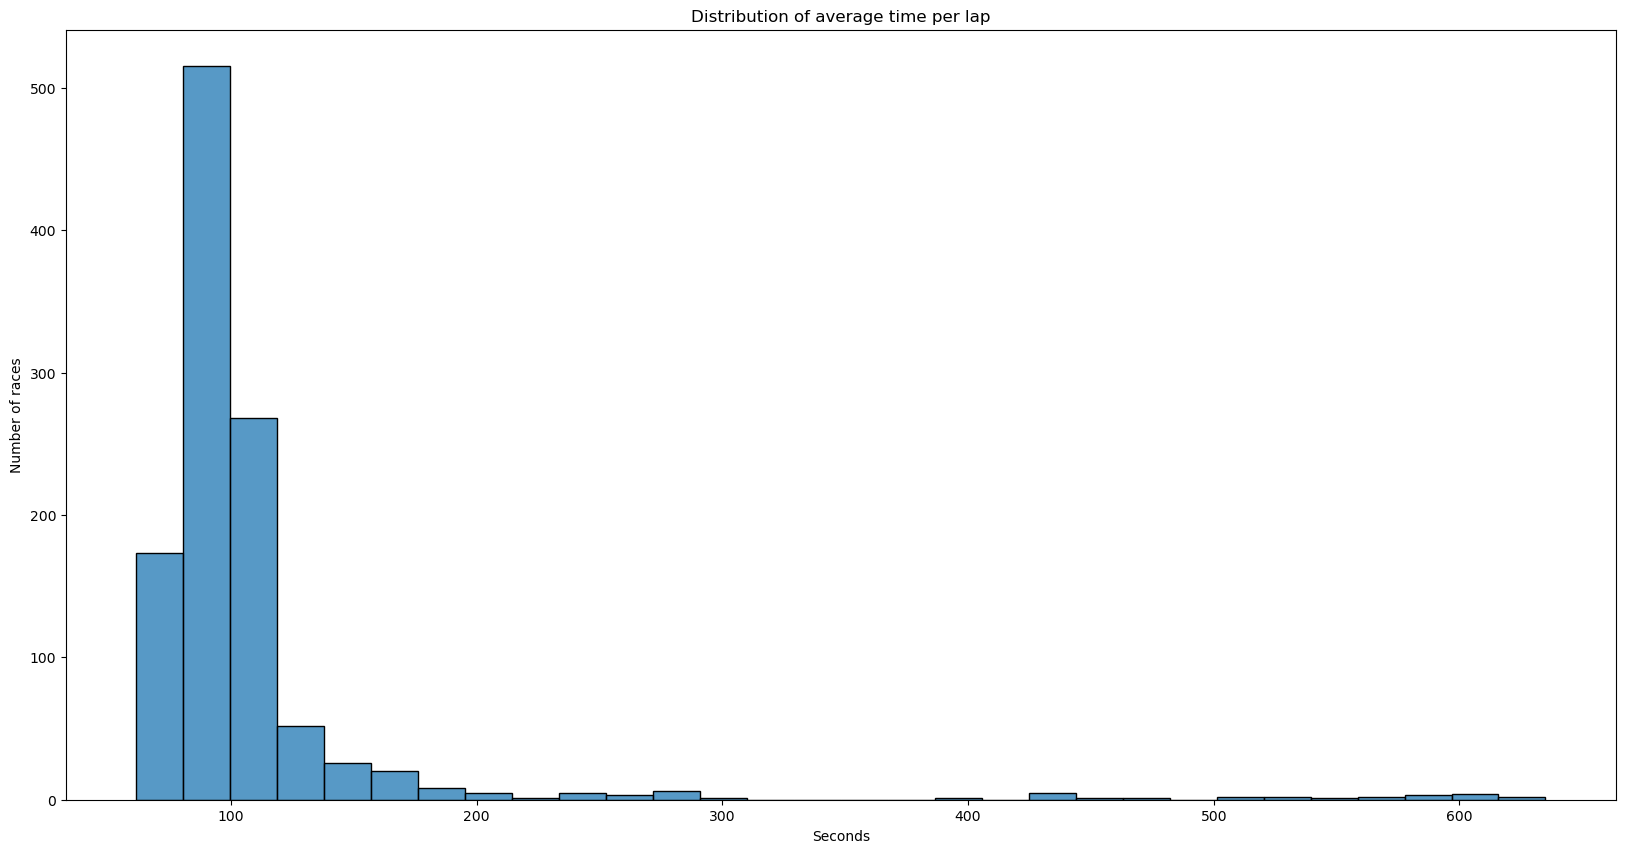

In [48]:
plt.figure(figsize=(20,10))
sns.histplot(data = results, x = 'Average Time per lap', bins = 30)
plt.title('Distribution of average time per lap')
plt.ylabel('Number of races')
plt.xlabel('Seconds')
plt.show()

In [49]:
results['Average Time per lap'].min(), results['Average Time per lap'].max()

(61.43775000000001, 635.02)

In [51]:
results[results['Average Time per lap']== results['Average Time per lap'].min()]

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Month,Hours,Minutes,Seconds,Total Time in Seconds,Average Time per lap
246,France,1974-07-07,Ronnie Peterson,Lotus Ford,80.0,1:21:55.020,PET,1974,Jul,1.0,21.0,55.02,4915.02,61.43775


In [52]:
results['Average Time per lap'].mean(), results['Average Time per lap'].median()

(109.27285716977333, 93.42905555555555)

### Observations:

- Average time per lap is mostly between 80 to 110 seconds.
- The mean value for average time per lap is 109 sec and median value is 93 sec.
- Minimum value of average time per lap is 61 seconds by Ronnie Peterson(Lotus Ford) at a race in France in 7/7/1974 where he completed 80 laps.
- Maximum value of average time per lap is 635 seconds by Graham Hill(BRM) at a race in Germany in 5/8/1962 where he completed 15 laps.

In [53]:
top_10_grandprix_by_laps = results.groupby('Grand Prix')['Laps'].mean().sort_values(ascending=False).head(10)
top_10_grandprix_by_laps

Grand Prix
Indianapolis 500    194.363636
Sakhir               87.000000
Pacific              83.000000
Monaco               81.202899
USA West             78.750000
South Africa         78.391304
Netherlands          78.090909
Sweden               75.666667
Caesar's Palace      75.000000
United States        74.615385
Name: Laps, dtype: float64

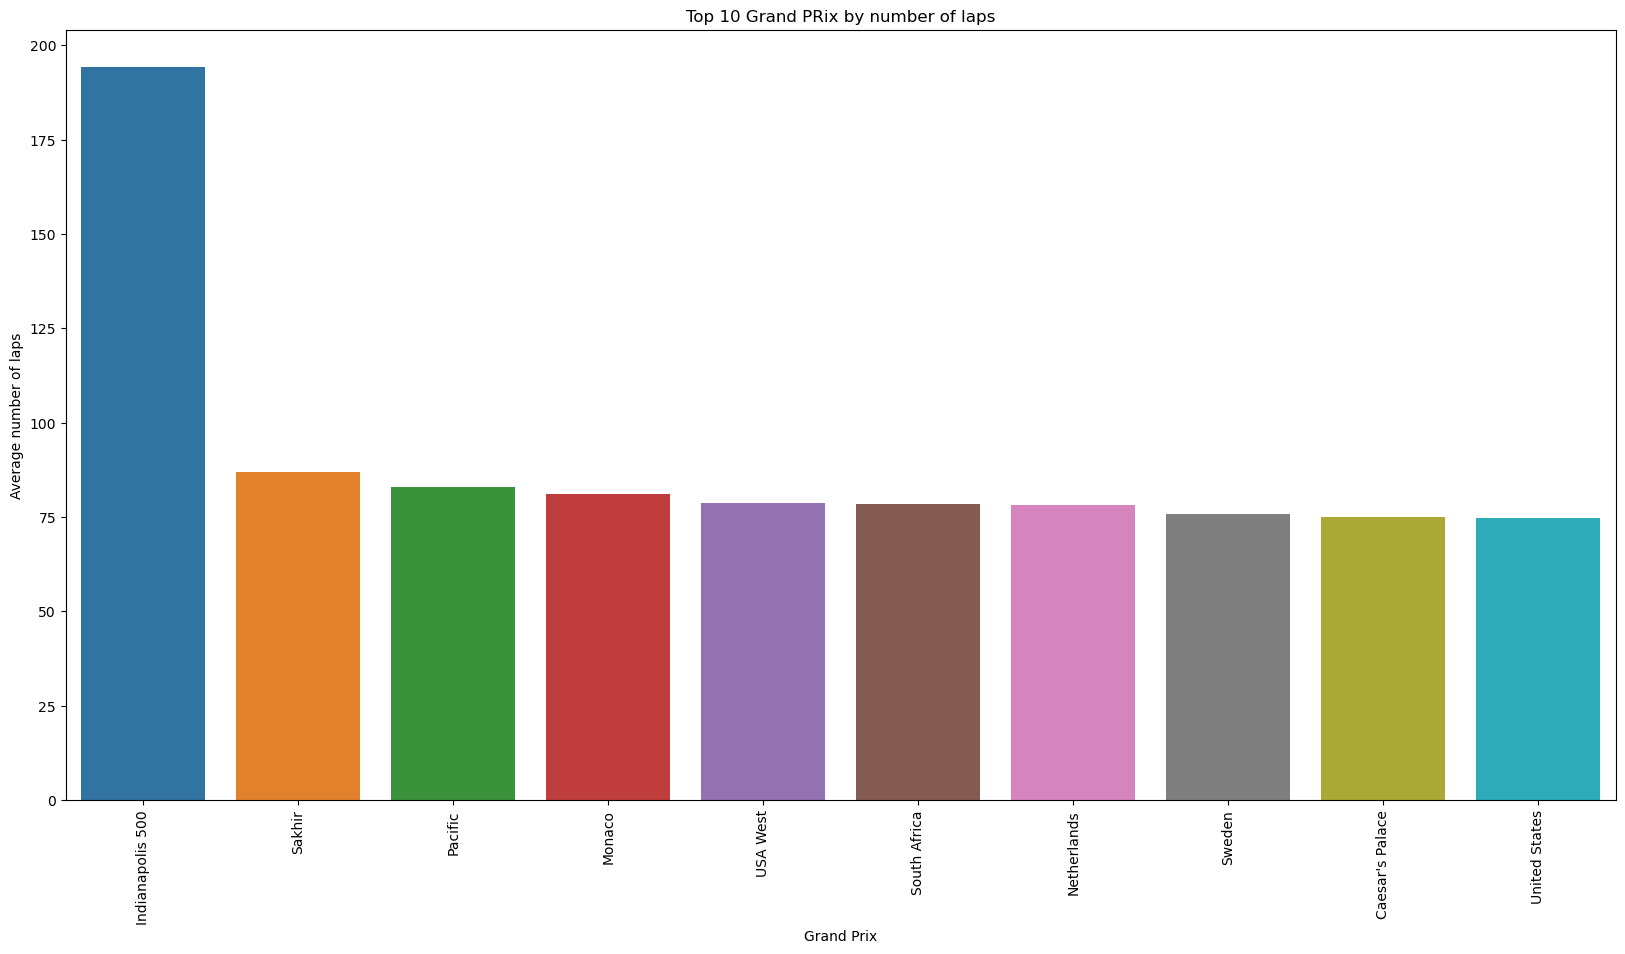

In [55]:
plt.figure(figsize = (20,10))
sns.barplot(x=top_10_grandprix_by_laps.index,y=top_10_grandprix_by_laps.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Grand PRix by number of laps')
plt.ylabel('Average number of laps')
plt.xlabel('Grand Prix')
plt.show()

### Observations:

- Indianapolis 500 Grand prix has the highest average number of laps(194) followed by Sakhir(87) and Pacific(83)

In [56]:
lowest_10_grandprix_by_laps = results.groupby('Grand Prix')['Laps'].mean().sort_values().head(10)
lowest_10_grandprix_by_laps

Grand Prix
Pescara             18.000000
Germany             40.421875
Belgium             44.838235
Las Vegas           50.000000
Saudi Arabia        50.000000
Azerbaijan          51.000000
70th Anniversary    52.000000
Russia              52.875000
Morocco             53.000000
Japan               53.605263
Name: Laps, dtype: float64

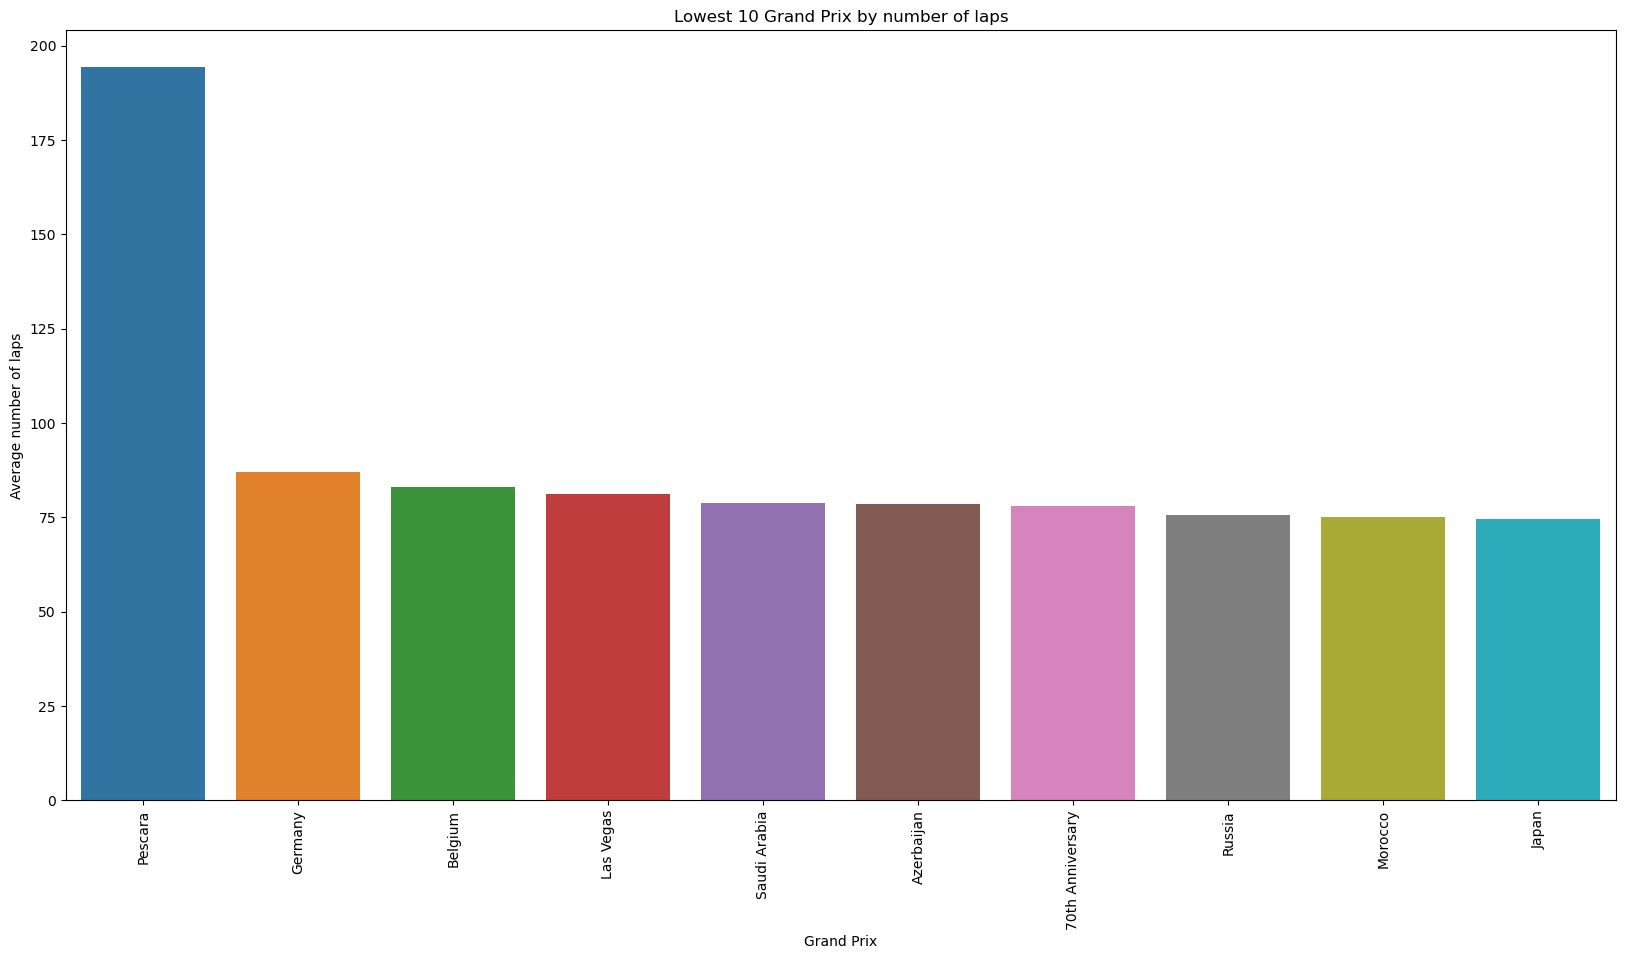

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x = lowest_10_grandprix_by_laps.index, y = top_10_grandprix_by_laps.values)
plt.xticks(rotation = 90)
plt.title('Lowest 10 Grand Prix by number of laps')
plt.ylabel('Average number of laps')
plt.xlabel('Grand Prix')
plt.show()

### Observations:

- Pescara Grand prix has the lowest average number of laps(18) followed by Germany(40) and Belguim(44)

In [58]:
top_10_grandprix_by_laps_time =results.groupby('Grand Prix')['Average Time per lap'].mean().sort_values(ascending = False).head(10)
top_10_grandprix_by_laps_time

Grand Prix
Pescara         597.927778
Germany         250.362604
Switzerland     155.908945
Belgium         151.825656
Morocco         146.322642
Tuscany         141.950169
South Korea     127.114345
Azerbaijan      125.482330
Singapore       116.929985
Saudi Arabia    111.762890
Name: Average Time per lap, dtype: float64

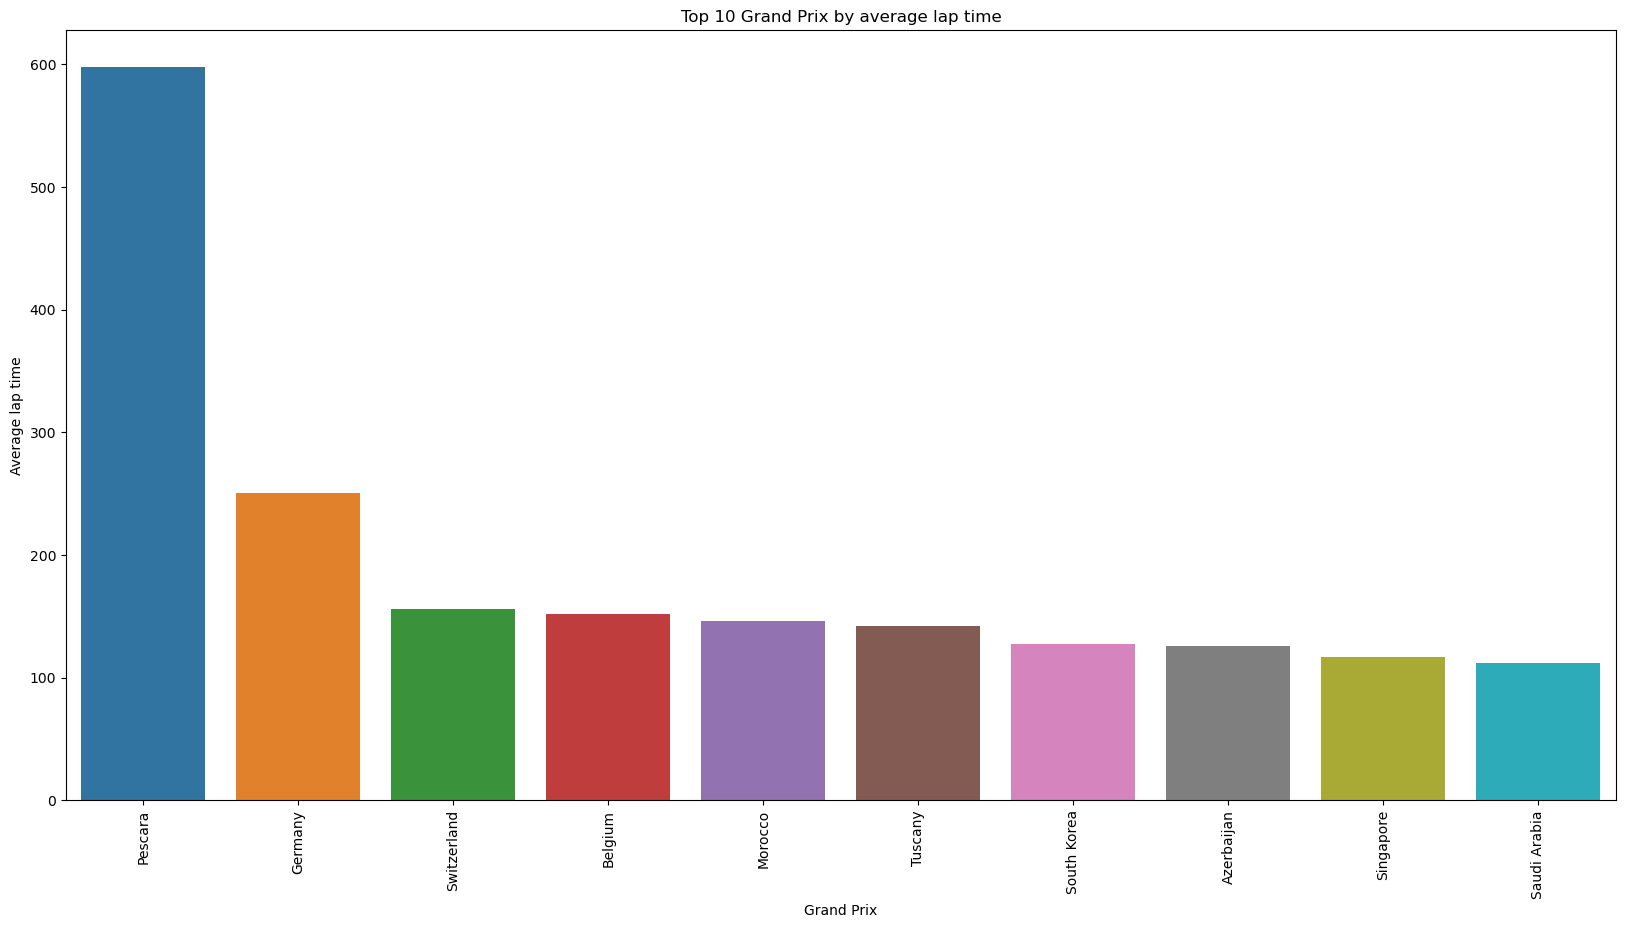

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_10_grandprix_by_laps_time.index, y = top_10_grandprix_by_laps_time.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Grand Prix by average lap time')
plt.ylabel('Average lap time')
plt.xlabel('Grand Prix')
plt.show()

### Observations:

- Percara Grand prix has the highest average time of laps(598 sec) followed by Germany (250 sec) and Switerland(155 sec).
- We have seen that pescara, germany had lowest number of laps but highest lap time which could mean that the circuits used in these races were longer

In [60]:
lowest_10_grandprix_by_laps_time =results.groupby('Grand Prix')['Average Time per lap'].mean().sort_values().head(10)
lowest_10_grandprix_by_laps_time

Grand Prix
Sakhir              62.932345
Indianapolis 500    68.850804
Styria              69.785972
Pacific             77.660633
South Africa        80.778633
Luxembourg          82.258448
Caesar's Palace     82.439767
USA West            85.857411
Hungary             86.276756
Austria             86.653293
Name: Average Time per lap, dtype: float64

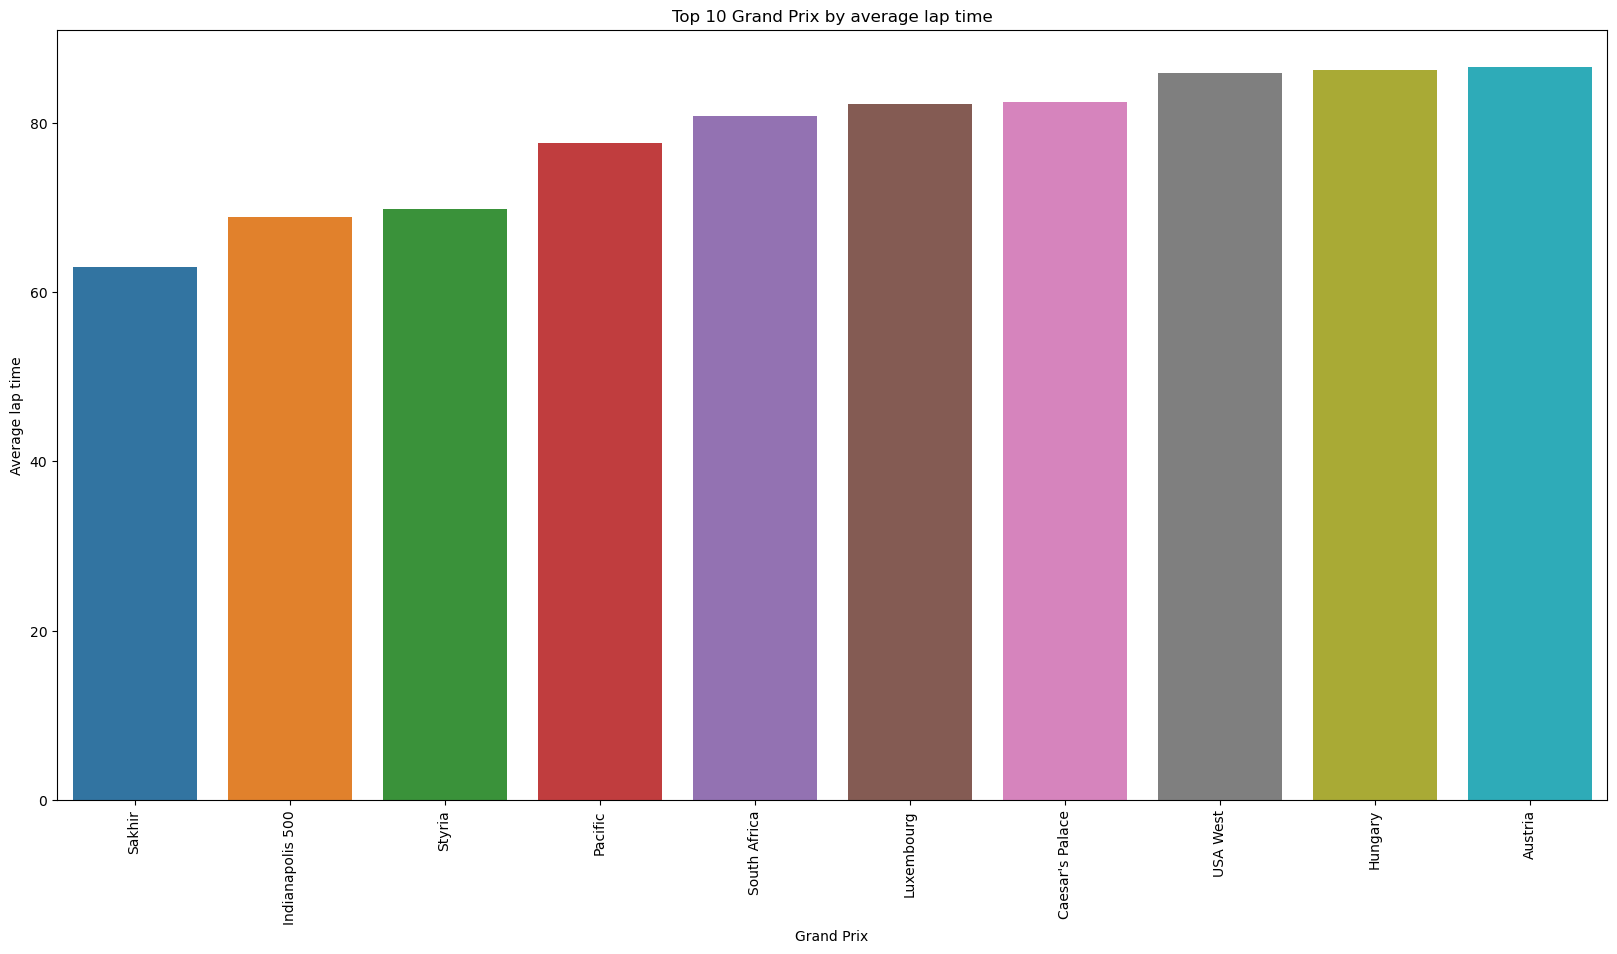

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x = lowest_10_grandprix_by_laps_time.index, y = lowest_10_grandprix_by_laps_time.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Grand Prix by average lap time')
plt.ylabel('Average lap time')
plt.xlabel('Grand Prix')
plt.show()

### Observations:

- Sakhir Grand prix has the lowest average time of laps(63 sec) followed by Indianapolis(69 sec) and Styria(70 sec).
- We have seen that Sakhir, Indianapolis had highest number of laps but lowest lap time which could mean that the circuits used in these races were shorter.

## Conclusion:

 We tried gaining insights from a dataset that is comparatively smaller than other available datasets. We could still get more insights by analysing other columns and other supporting csv files available in this dataset.